In [3]:
!pip install vaderSentiment
!pip install spacy
!pip install spacymoji

In [4]:
import vaderSentiment
# calling SentimentIntensityAnalyzer object
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()

In [25]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer  
le=WordNetLemmatizer()

from nltk.tokenize import TweetTokenizer
tt = TweetTokenizer()
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\balam\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\balam\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [43]:
import pandas as pd
df = pd.read_csv("SentimentTweets01.csv", encoding = "utf-8-sig", sep = ",")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dominant_Topic     105000 non-null  int64  
 1   Perc_Contribution  105000 non-null  float64
 2   Topic_Keywords     105000 non-null  object 
 3   text               105000 non-null  object 
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   

                                                text  
0  @MaryLTrump @DavidCornDC Agreed, why do people...  
1  AD iHealth™ Covid-19 Antigen testing kits for ...  
2  Study links even mild Covid-19 to changes in t...  
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...  
4  SFC urges Hong Kong businesses to update conti...

In [44]:
df1 = pd.read_csv("SentimentTweets01_cleantxt.csv", encoding = "utf-8-sig", sep = ",")
df['clean_text'] = df1['clean_text']

In [45]:
df.iloc[20:50, 3]

20    Watch Live: Covid-19 update.\nhttps://t.co/LRj...
21    @RealScottRitter Buddy...half way into trumps ...
22    @BarryF107 @DrTeckKhong COVID-19: The Great Re...
23    London police are keeping their #COVID19 vacci...
24    🧨JUST IN: Florida Dept. of Health to recommend...
25    @IRaigothI @Jeffrey67094350 @richmeyer @TheLes...
26    Excellent news! Congratulations Florida on fol...
27    Cases: 447,352,722 (+46,782) \nDeaths: 6,006,1...
28    Your community depends on you. Want to help st...
29    Dr David Martin, [Mar 7, 2022 at 17:35]\nRelea...
30    @aliasvaughn @highbrow_nobrow The prices are h...
31    The Board is now discussing updates to COVID-1...
32    2 years ago... this was our last normal week a...
33    Two years since first case of COVID-19 confirm...
34    #DidYouKnow that monoclonal antibody treatment...
35    @GalloVOA @tommywalkerco It's interesting that...
36    🚨 COVID-19 Guidelines Reminder! 🚨\n\nReminder ...
37    We'll have a limited number of door ticket

In [46]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105000 entries, 0 to 104999
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Dominant_Topic     105000 non-null  int64  
 1   Perc_Contribution  105000 non-null  float64
 2   Topic_Keywords     105000 non-null  object 
 3   text               105000 non-null  object 
 4   clean_text         104885 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 4.0+ MB


In [47]:
df['clean_text'] = df['clean_text'].fillna("")

In [48]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [49]:
df['VD_Scores'] = df['clean_text'].apply(lambda x: analyser.polarity_scores(x))

df.head()

Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   

                                                text  \
0  @MaryLTrump @DavidCornDC Agreed, why do people...   
1  AD iHealth™ Covid-19 Antigen testing kits for ...   
2  Study links even mild Covid-19 to changes in t...   
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...   
4  SFC urges Hong Kong businesses to update conti...   

                                          clean_text  \
0   agree people keep support democrats covid lie...   
1          ad_ihealth covid antigen testing kit sale   
2        study_link even_mild covid change brain cnn   
3                      non death top death march hkt   
4       sfc_urge update mass covid testing loom city   

                                           VD_Scores  
0  {'neg': 0.492, 'neu': 0.345, 'pos': 0.163, 'co...  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...  
3  {'neg': 0.619, 'neu': 0.238, 'pos': 0.143, 'co...  
4  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...

In [50]:
df['VD_Compound']  = df['VD_Scores'].apply(lambda score_dict: score_dict['compound'])
df.head(10)

Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   
5               9             0.7387   
6               8             0.7373   
7               8             0.6730   
8               5             0.2922   
9              13             0.3506   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   
5  covid, get, people, mask, still, know, say, li...   
6  covid, patient, pandemic, care, hospital, impa...   
7  covid, patient, pandemic, care, hospital, impa...   
8  covid, amp, pandemic, people, work, woman, mak...   
9  covid, amp, get, vaccine, booster, clinic, boo...   

                                                text  \
0  @MaryLTrump @DavidCornDC Agreed, why do people...   
1  AD iHealth™ Covid-19 Antigen testing kits for ...   
2  Study links even mild Covid-19 to changes in t...   
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...   
4  SFC urges Hong Kong businesses to update conti...   
5  @Lou_ell_ah @RachelNotley You’ve taken a few t...   
6  A look at COVID medical waste and how to handl...   
7  ….information from the platforms about the maj...   
8  Uncontrolled spread of #Covid19 can lead to th...   
9  Does anyone know if iHealth Covid-19 antigen r...   

                                          clean_text  \
0   agree people keep support democrats covid lie...   
1          ad_ihealth covid antigen testing kit sale   
2        study_link even_mild covid change brain cnn   
3                      non death top death march hkt   
4       sfc_urge update mass covid testing loom city   
5   take many hit crack pipe work well vaccine wh...   
6                    look covid medical waste handle   
7   information platform major source covid misin...   
8   uncontrolled spread lead creation bad variant...   
9   anyone know ihealth covid antigen_rapid test ...   

                                           VD_Scores  VD_Compound  
0  {'neg': 0.492, 'neu': 0.345, 'pos': 0.163, 'co...      -0.8885  
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000  
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000  
3  {'neg': 0.619, 'neu': 0.238, 'pos': 0.143, 'co...      -0.7906  
4  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...      -0.2263  
5  {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...       0.5859  
6  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...      -0.4215  
7  {'neg': 0.123, 'neu': 0.626, 'pos': 0.25, 'com...       0.3892  
8  {'neg': 0.48, 'neu': 0.375, 'pos': 0.145, 'com...      -0.9246  
9  {'neg': 0.104, 'neu': 0.808, 'pos': 0.088, 'co...      -0.1027

In [114]:
#Assign a positive/negative/nuetral sentiment based on score
def classify_sentiment(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
#df['Sentiment'] = df['compound'].apply(lambda c: 'positive' if c >=0.00  else 'negative')

df['VD_Sentiment'] = df['VD_Compound'].apply(classify_sentiment)
df.head(10)

Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   
5               9             0.7387   
6               8             0.7373   
7               8             0.6730   
8               5             0.2922   
9              13             0.3506   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   
5  covid, get, people, mask, still, know, say, li...   
6  covid, patient, pandemic, care, hospital, impa...   
7  covid, patient, pandemic, care, hospital, impa...   
8  covid, amp, pandemic, people, work, woman, mak...   
9  covid, amp, get, vaccine, booster, clinic, boo...   

                                                text  \
0  @MaryLTrump @DavidCornDC Agreed, why do people...   
1  AD iHealth™ Covid-19 Antigen testing kits for ...   
2  Study links even mild Covid-19 to changes in t...   
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...   
4  SFC urges Hong Kong businesses to update conti...   
5  @Lou_ell_ah @RachelNotley You’ve taken a few t...   
6  A look at COVID medical waste and how to handl...   
7  ….information from the platforms about the maj...   
8  Uncontrolled spread of #Covid19 can lead to th...   
9  Does anyone know if iHealth Covid-19 antigen r...   

                                          clean_text  \
0   agree people keep support democrats covid lie...   
1          ad_ihealth covid antigen testing kit sale   
2        study_link even_mild covid change brain cnn   
3                      non death top death march hkt   
4       sfc_urge update mass covid testing loom city   
5   take many hit crack pipe work well vaccine wh...   
6                    look covid medical waste handle   
7   information platform major source covid misin...   
8   uncontrolled spread lead creation bad variant...   
9   anyone know ihealth covid antigen_rapid test ...   

                                           VD_Scores  VD_Compound  \
0  {'neg': 0.492, 'neu': 0.345, 'pos': 0.163, 'co...      -0.8885   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
3  {'neg': 0.619, 'neu': 0.238, 'pos': 0.143, 'co...      -0.7906   
4  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...      -0.2263   
5  {'neg': 0.0, 'neu': 0.758, 'pos': 0.242, 'comp...       0.5859   
6  {'neg': 0.412, 'neu': 0.588, 'pos': 0.0, 'comp...      -0.4215   
7  {'neg': 0.123, 'neu': 0.626, 'pos': 0.25, 'com...       0.3892   
8  {'neg': 0.48, 'neu': 0.375, 'pos': 0.145, 'com...      -0.9246   
9  {'neg': 0.104, 'neu': 0.808, 'pos': 0.088, 'co...      -0.1027   

  VD_Sentiment                                          temp_list  TB_score  \
0     Negative  [agree, people, keep, support, democrats, covi...  -0.50000   
1      Neutral   [ad_ihealth, covid, antigen, testing, kit, sale]   0.00000   
2      Neutral  [study_link, even_mild, covid, change, brain, ...   0.00000   
3     Negative               [non, death, top, death, march, hkt]   0.50000   
4     Negative  [sfc_urge, update, mass, covid, testing, loom,...   0.00000   
5     Positive  [take, many, hit, crack, pipe, work, well, vac...   0.40000   
6     Negative              [look, covid, medical, waste, handle]  -0.10000   
7     Positive  [information, platform, major, source, covid, ...   0.43125   
8     Negative  [uncontrolled, spread, lead, creation, bad, va...  -0.10000   
9     Negative  [anyone, know, ihealth, covid, antigen_rapid, ...   0.00000   

   TB_subjectivity TB_Subjectivity TB_Sentiment       Emotion  
0         1.00000

In [52]:
import seaborn as sns
var1 = df.groupby(['Dominant_Topic','VD_Sentiment']).count()['text'].reset_index().sort_values(by='Dominant_Topic',ascending=True)
sns.set_style("white")
sns.set_palette("Set3")
var1.style.background_gradient()

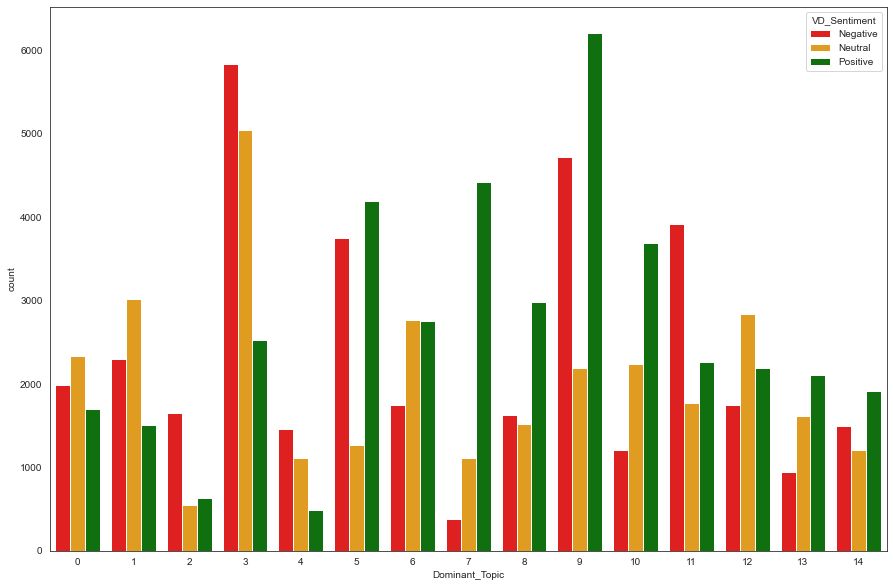

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Dominant_Topic', hue='VD_Sentiment', palette = ['red', 'orange', 'green'])
plt.show()

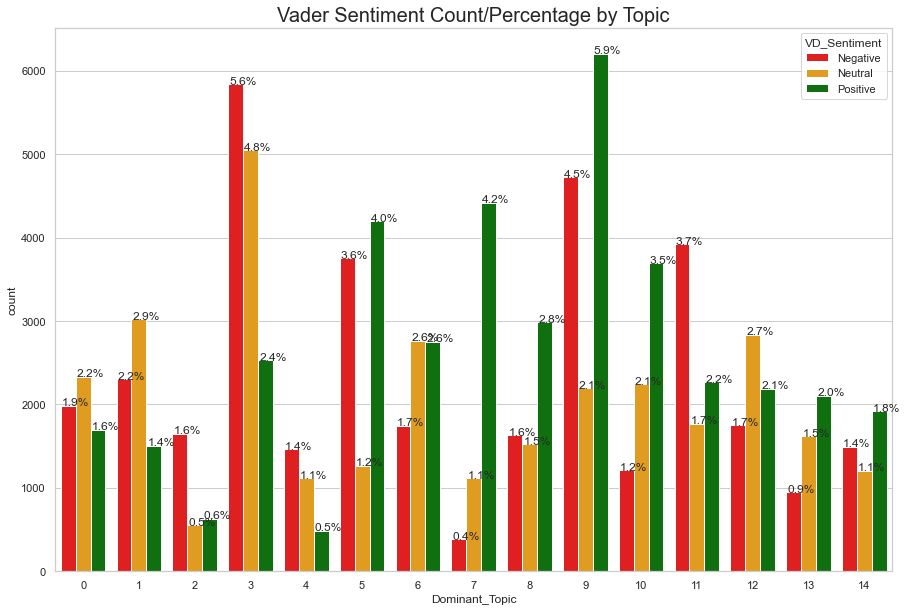

In [104]:
sns.set(style="whitegrid")

total = float(len(df))
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x='Dominant_Topic', hue='VD_Sentiment', palette = ['red', 'orange', 'green'])
plt.title('Vader Sentiment Count/Percentage by Topic', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [55]:
from collections import Counter
import plotly.express as px
import plotly.figure_factory as ff
df['temp_list'] = df['clean_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
#temp.style.background_gradient(cmap='Blues')
fig = px.bar(temp, x="count", y="Common_words", title='Commmon Words in Selected Text', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

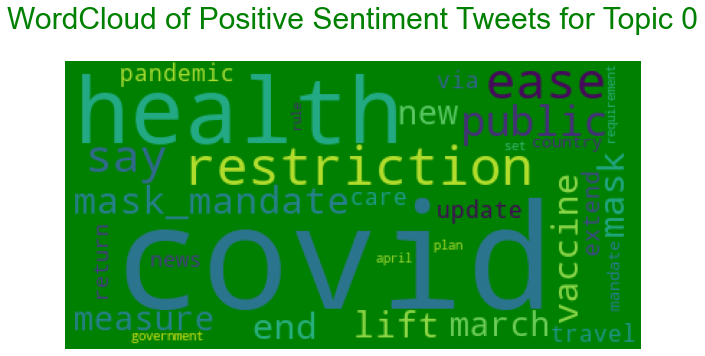

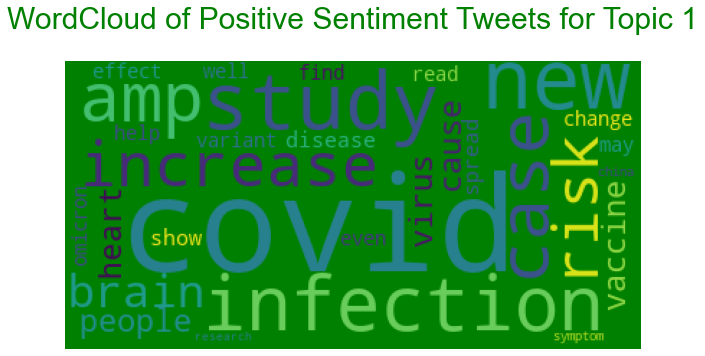

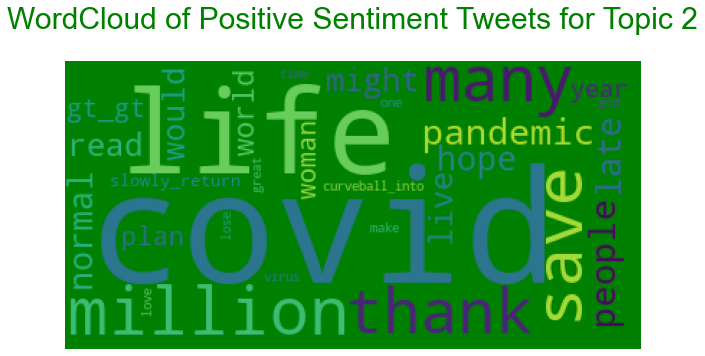

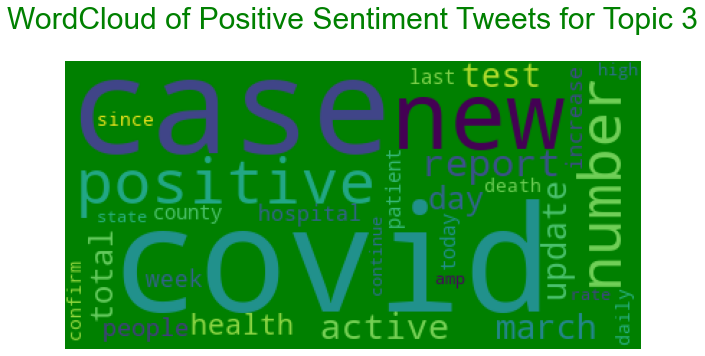

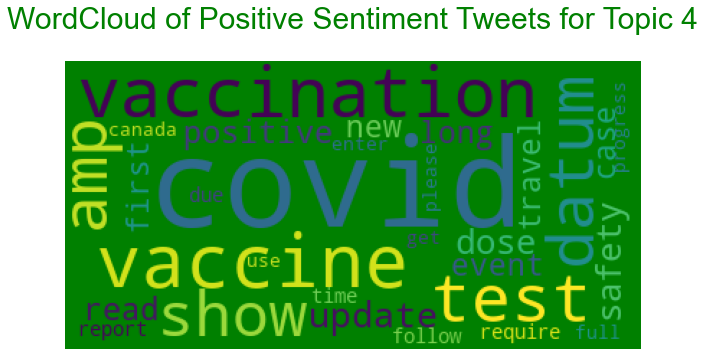

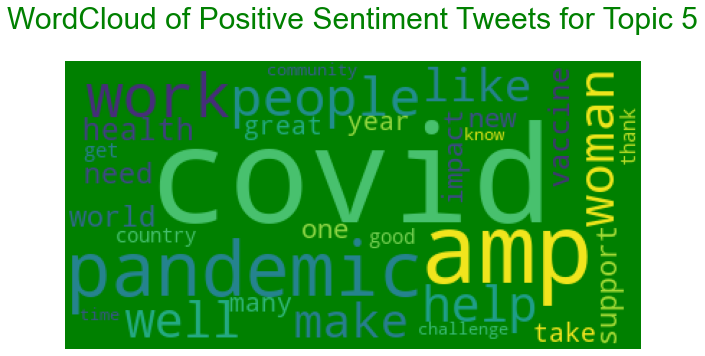

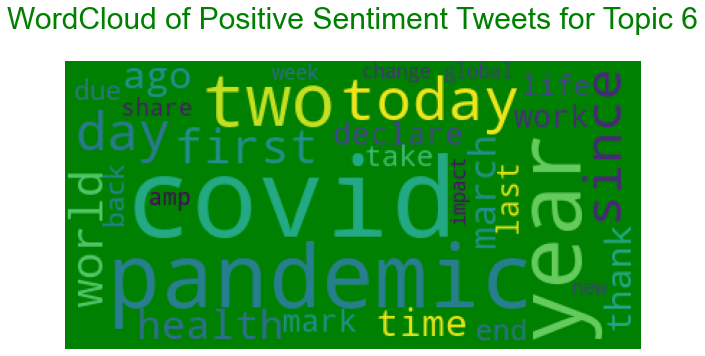

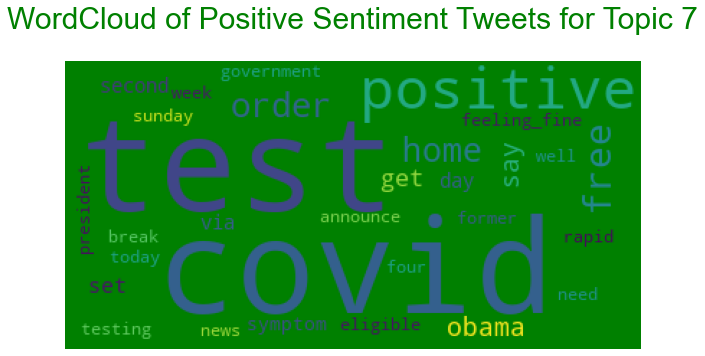

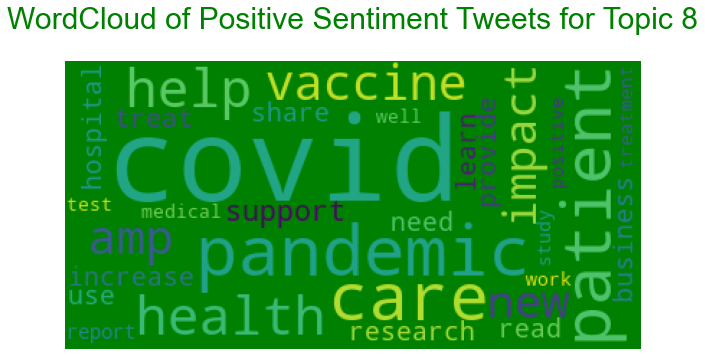

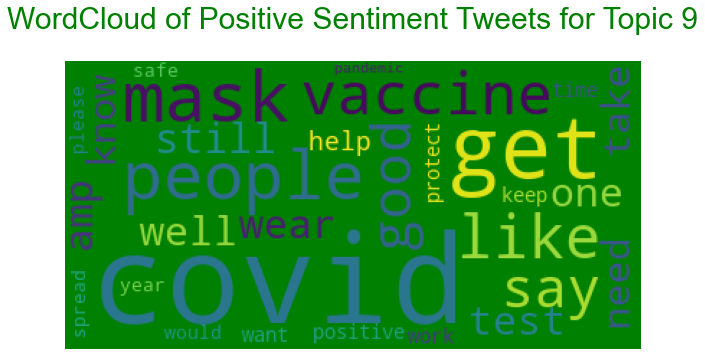

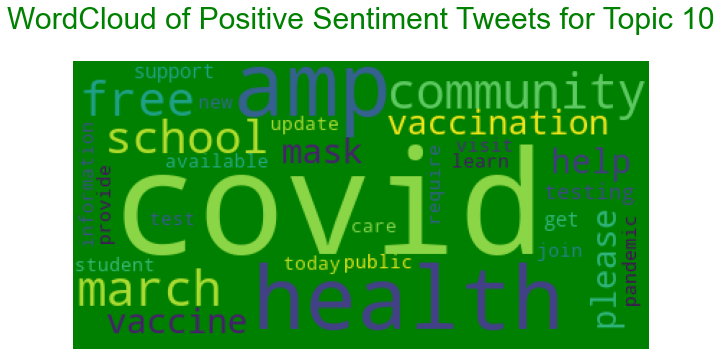

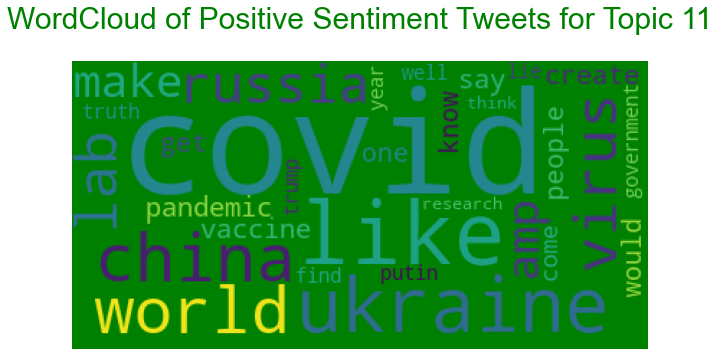

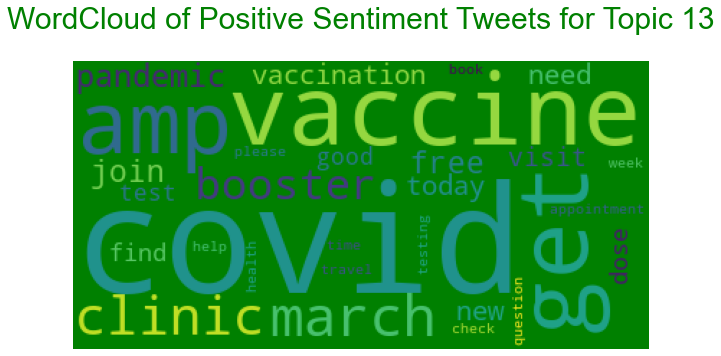

In [124]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None
for i in range(15):
    df_wc = df[(df.VD_Sentiment == "Positive") & (df.Dominant_Topic == i)]
    temp = df_wc['clean_text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp for item in sublist])
    txt = dict(top.most_common(30))
    txt

    #txt = tuple([tuple(x) for x in text.value_counts().reset_index().values])
    #print(txt)

    wordcloud = WordCloud( 
                    background_color ='green', 
                    stopwords = stopwords, 
                    min_font_size = 5).generate_from_frequencies(txt)

    # #plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title("WordCloud of Positive Sentiment Tweets for Topic " + str(i) + "\n", fontdict = {'fontsize' : 30}, color = "green", pad = 0)
    plt.tight_layout(pad = 0) 

    plt.show()


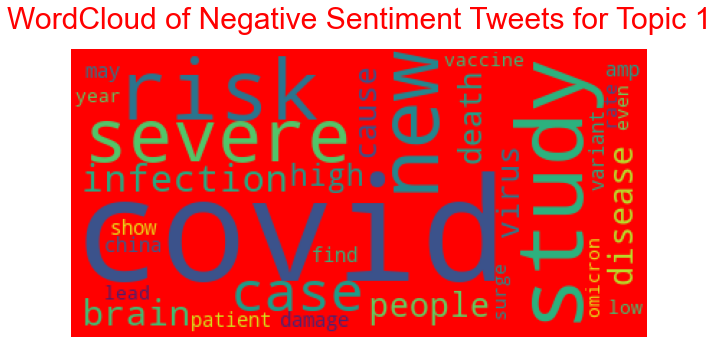

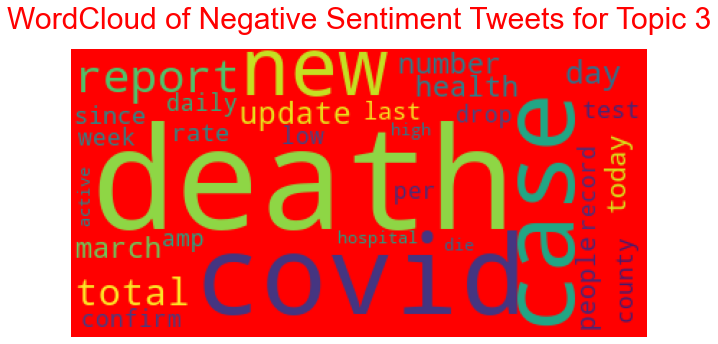

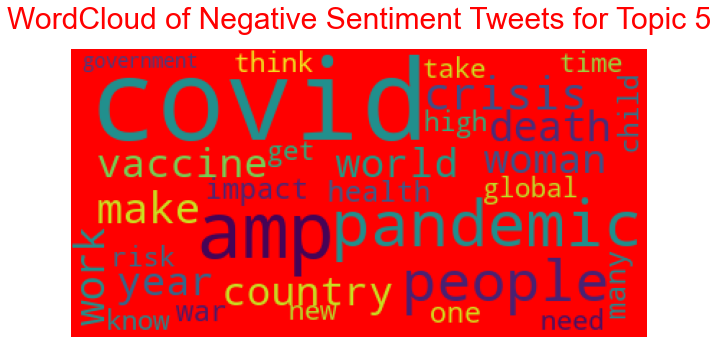

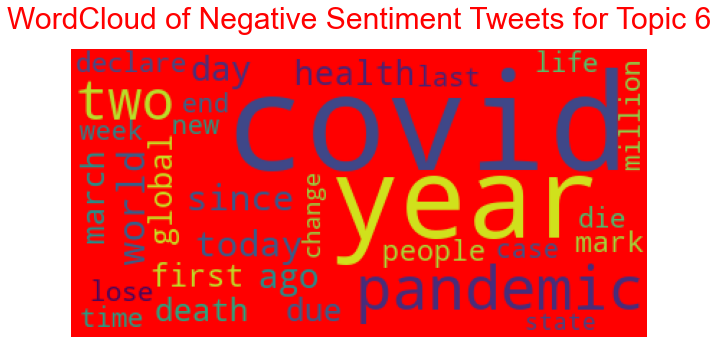

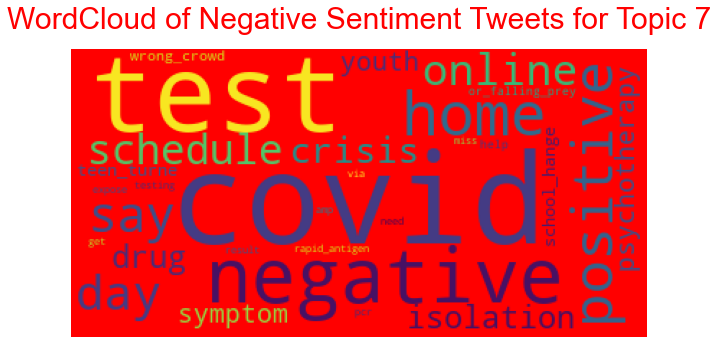

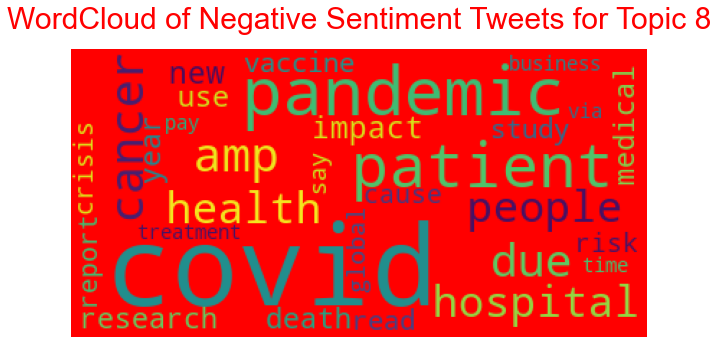

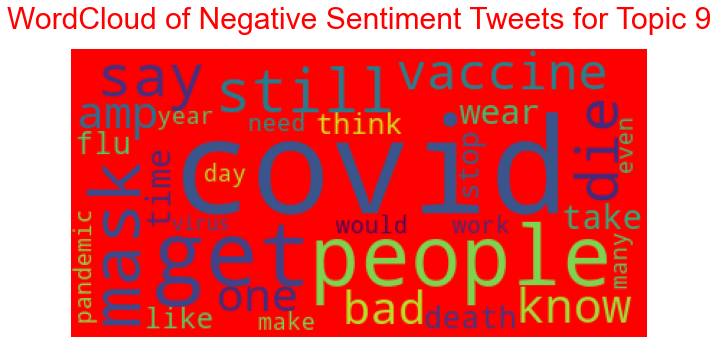

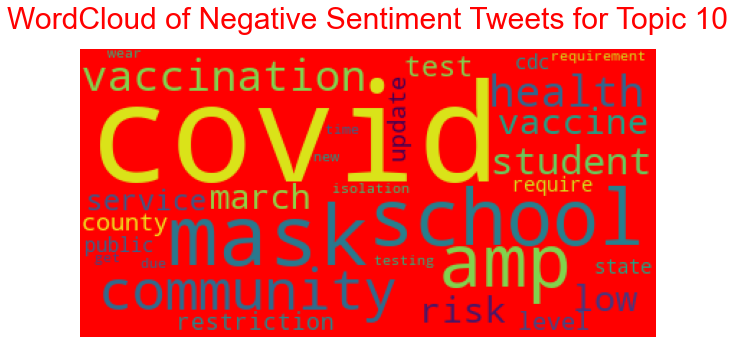

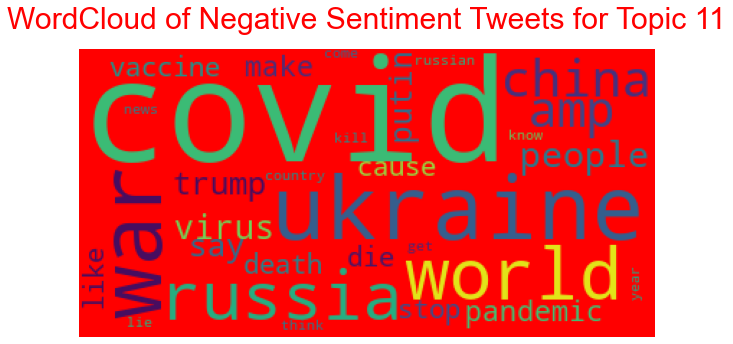

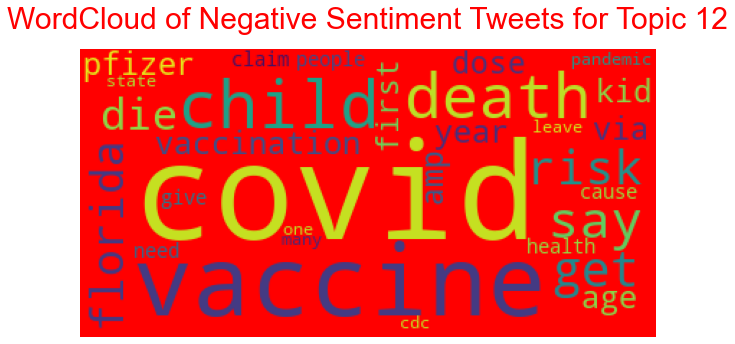

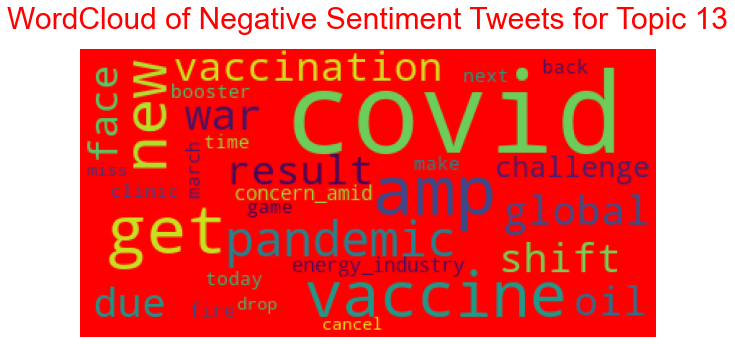

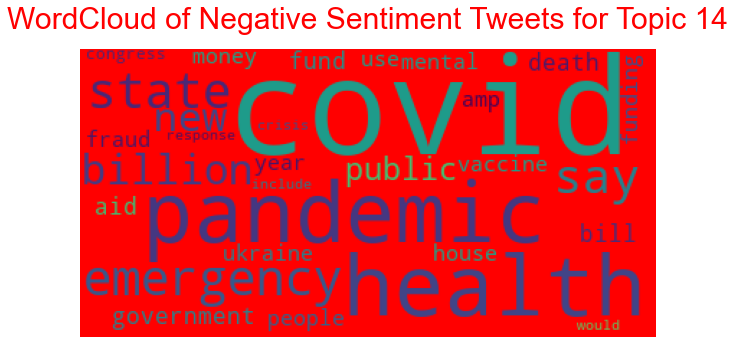

In [121]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None
for i in range(15):
    df_wc = df[(df.VD_Sentiment == "Negative") & (df.Dominant_Topic == i)]
    temp = df_wc['clean_text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp for item in sublist])
    txt = dict(top.most_common(30))
    txt

    #txt = tuple([tuple(x) for x in text.value_counts().reset_index().values])
    #print(txt)

    wordcloud = WordCloud( 
                    background_color ='red', 
                    stopwords = stopwords, 
                    min_font_size = 5).generate_from_frequencies(txt)

    # #plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title("WordCloud of Negative Sentiment Tweets for Topic " + str(i), fontdict = {'fontsize' : 30}, color = "red", pad = 20)
    plt.tight_layout(pad = 0) 

    plt.show() 

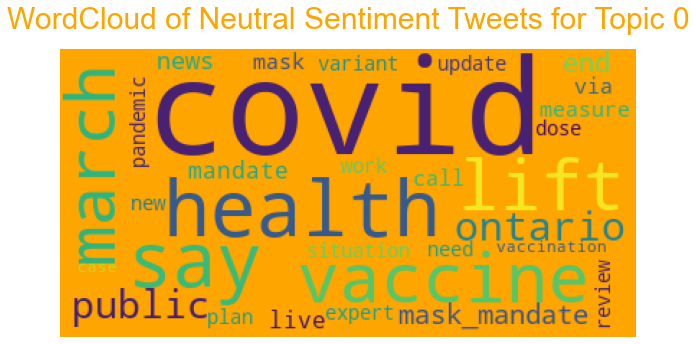

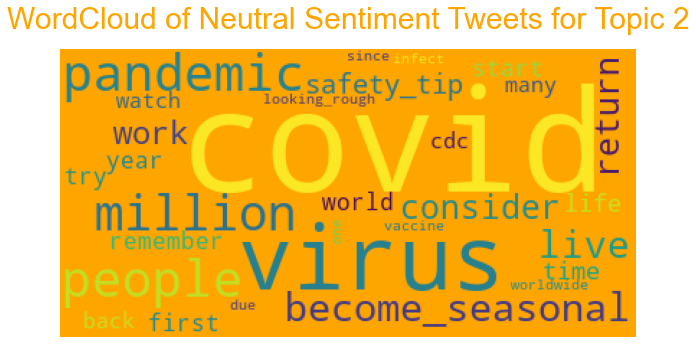

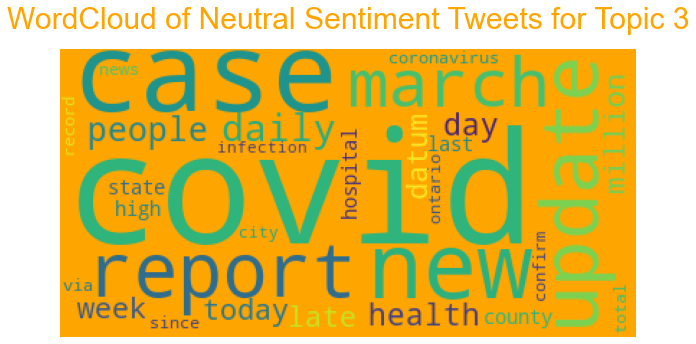

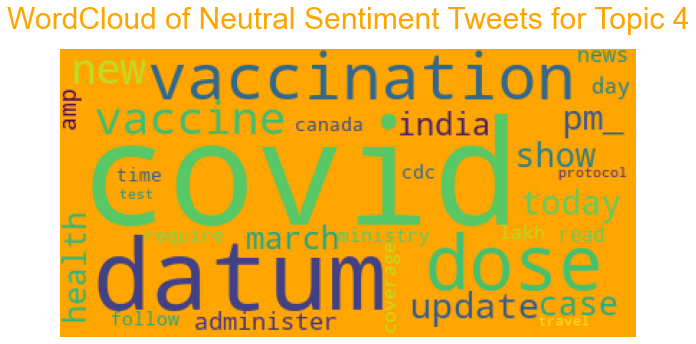

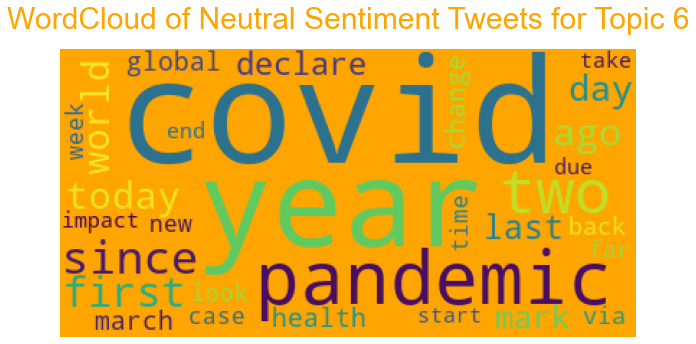

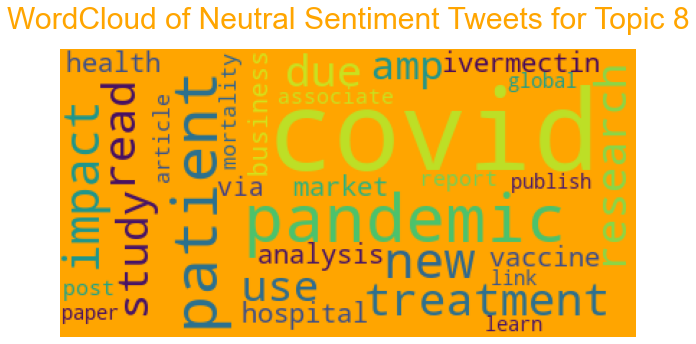

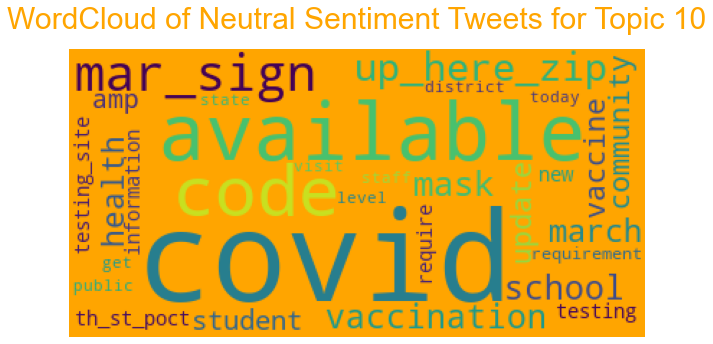

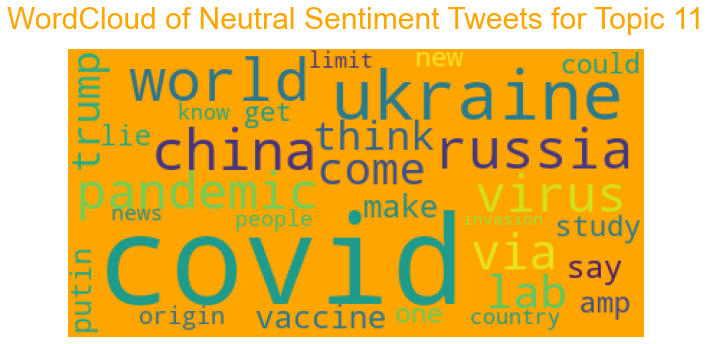

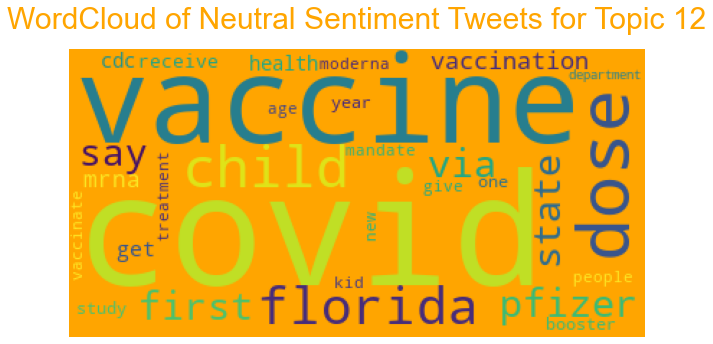

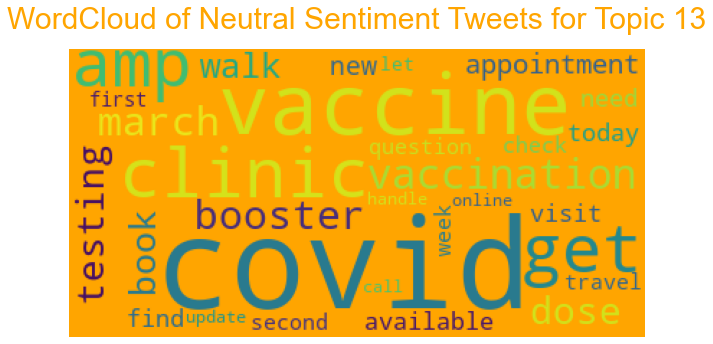

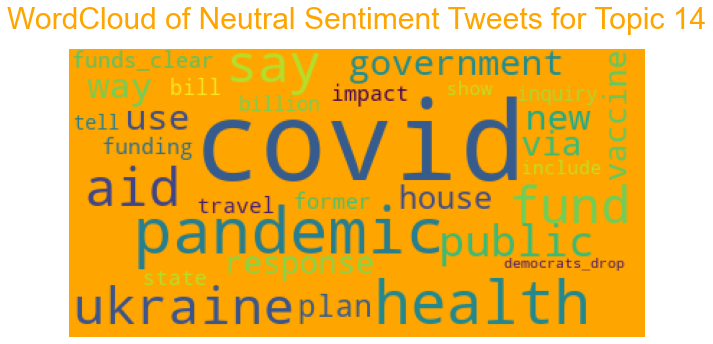

In [122]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
pd.options.mode.chained_assignment = None
for i in range(15):
    df_wc  = df[(df.VD_Sentiment == "Neutral") & (df.Dominant_Topic == i)]
    temp = df_wc['clean_text'].apply(lambda x:str(x).split())
    top = Counter([item for sublist in temp for item in sublist])
    txt = dict(top.most_common(30))
    txt

    #txt = tuple([tuple(x) for x in text.value_counts().reset_index().values])
    #print(txt)

    wordcloud = WordCloud( 
                    background_color ='orange', 
                    stopwords = stopwords, 
                    min_font_size = 5).generate_from_frequencies(txt)

    # #plot the WordCloud image                        
    plt.figure(figsize = (8, 8), facecolor = None) 
    plt.imshow(wordcloud) 
    plt.axis("off") 
    plt.title("WordCloud of Neutral Sentiment Tweets for Topic " + str(i), fontdict = {'fontsize' : 30}, color = "orange", pad = 20)
    plt.tight_layout(pad = 0) 

    plt.show() 

In [97]:
import warnings
warnings.filterwarnings('ignore')
from textblob import TextBlob, Word, Blobber

In [98]:
#df['TB_sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment)
df['TB_score'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment[0])
df['TB_subjectivity'] = df['clean_text'].apply(lambda x: TextBlob(x).sentiment[1])
df.head()

Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   

                                                text  \
0  @MaryLTrump @DavidCornDC Agreed, why do people...   
1  AD iHealth™ Covid-19 Antigen testing kits for ...   
2  Study links even mild Covid-19 to changes in t...   
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...   
4  SFC urges Hong Kong businesses to update conti...   

                                          clean_text  \
0   agree people keep support democrats covid lie...   
1          ad_ihealth covid antigen testing kit sale   
2        study_link even_mild covid change brain cnn   
3                      non death top death march hkt   
4       sfc_urge update mass covid testing loom city   

                                           VD_Scores  VD_Compound  \
0  {'neg': 0.492, 'neu': 0.345, 'pos': 0.163, 'co...      -0.8885   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
3  {'neg': 0.619, 'neu': 0.238, 'pos': 0.143, 'co...      -0.7906   
4  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...      -0.2263   

  VD_Sentiment                                          temp_list  TB_score  \
0     Negative  [agree, people, keep, support, democrats, covi...      -0.5   
1      Neutral   [ad_ihealth, covid, antigen, testing, kit, sale]       0.0   
2      Neutral  [study_link, even_mild, covid, change, brain, ...       0.0   
3     Negative               [non, death, top, death, march, hkt]       0.5   
4     Negative  [sfc_urge, update, mass, covid, testing, loom,...       0.0   

   TB_subjectivity  
0              1.0  
1              0.0  
2              0.0  
3              0.5  
4              0.0

In [99]:
#Assign a subjectivity based on subjectivity score
def classify_subjectivity(x):
    if x>= 0.5:
        return "Opinion"
    else:
        return "Factual"


df['TB_Subjectivity'] = df['TB_subjectivity'].apply(classify_subjectivity)
df.head()

Dominant_Topic  Perc_Contribution  \
0              11             0.5456   
1               7             0.8173   
2               1             0.9977   
3               3             0.8239   
4               0             0.4599   

                                      Topic_Keywords  \
0  covid, ukraine, war, world, russia, china, lik...   
1  test, covid, positive, home, free, order, obam...   
2  covid, study, new, infection, case, china, ris...   
3  covid, case, death, new, report, update, march...   
4  covid, restriction, health, say, lift, public,...   

                                                text  \
0  @MaryLTrump @DavidCornDC Agreed, why do people...   
1  AD iHealth™ Covid-19 Antigen testing kits for ...   
2  Study links even mild Covid-19 to changes in t...   
3  ,...a NON-#covid19 death ON TOP OF ALL the #co...   
4  SFC urges Hong Kong businesses to update conti...   

                                          clean_text  \
0   agree people keep support democrats covid lie...   
1          ad_ihealth covid antigen testing kit sale   
2        study_link even_mild covid change brain cnn   
3                      non death top death march hkt   
4       sfc_urge update mass covid testing loom city   

                                           VD_Scores  VD_Compound  \
0  {'neg': 0.492, 'neu': 0.345, 'pos': 0.163, 'co...      -0.8885   
1  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
2  {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...       0.0000   
3  {'neg': 0.619, 'neu': 0.238, 'pos': 0.143, 'co...      -0.7906   
4  {'neg': 0.241, 'neu': 0.759, 'pos': 0.0, 'comp...      -0.2263   

  VD_Sentiment                                          temp_list  TB_score  \
0     Negative  [agree, people, keep, support, democrats, covi...      -0.5   
1      Neutral   [ad_ihealth, covid, antigen, testing, kit, sale]       0.0   
2      Neutral  [study_link, even_mild, covid, change, brain, ...       0.0   
3     Negative               [non, death, top, death, march, hkt]       0.5   
4     Negative  [sfc_urge, update, mass, covid, testing, loom,...       0.0   

   TB_subjectivity TB_Subjectivity  
0              1.0         Opinion  
1              0.0         Factual  
2              0.0         Factual  
3              0.5         Opinion  
4              0.0         Factual

In [100]:
df['TB_Sentiment'] = df['TB_score'].apply(classify_sentiment)
df.head(50)

Dominant_Topic  Perc_Contribution  \
0               11             0.5456   
1                7             0.8173   
2                1             0.9977   
3                3             0.8239   
4                0             0.4599   
5                9             0.7387   
6                8             0.7373   
7                8             0.6730   
8                5             0.2922   
9               13             0.3506   
10              10             0.4965   
11               3             0.6312   
12               2             0.6830   
13               8             0.3518   
14              13             0.3205   
15               1             0.5499   
16              12             0.6616   
17               3             0.5048   
18               2             0.9977   
19               5             0.8488   
20               2             0.6267   
21               5             0.9994   
22               0             0.9931   
23               0             0.7320   
24              12             0.9987   
25              11             0.8384   
26              12             0.6448   
27               3             0.5247   
28               9             0.7504   
29              10             0.5966   
30               5             0.5008   
31               6             0.4122   
32               6             0.6505   
33               3             0.5717   
34              10             0.6475   
35               4             0.4735   
36              10             0.5520   
37               4             0.6284   
38               3             0.4554   
39               9             0.5039   
40              12             0.4991   
41               3             0.5221   
42              12             0.8994   
43               5             0.4033   
44              12             0.4495   
45               7             0.9980   
46              13             0.2797   
47               1             0.5116   
48               9             0.7247   
49               9             0.6956   

                                       Topic_Keywords  \
0   covid, ukraine, war, world, russia, china, lik...   
1   test, covid, positive, home, free, order, obam...   
2   covid, study, new, infection, case, china, ris...   
3   covid, case, death, new, report, update, march...   
4   covid, restriction, health, say, lift, public,...   
5   covid, get, people, mask, still, know, say, li...   
6   covid, patient, pandemic, care, hospital, impa...   
7   covid, patient, pandemic, care, hospital, impa...   
8   covid, amp, pandemic, people, work, woman, mak...   
9   covid, amp, get, vaccine, booster, clinic, boo...   
10  covid, school, community, available, amp, vacc...   
11  covid, case, death, new, report, update, march...   
12  die, covid, people, million, life, death, amer...   
13  covid, patient, pandemic, care, hospital, impa...   
14  covid, amp, get, vaccine, booster, clinic, boo...   
15  covid, study, new, infection, case, china, ris...   
16  vaccine, covid, child, dose, pfizer, kid, flor...   
17  covid, case, death, new, report, update, march...   
18  die, covid, people, million, life, death, amer...   
19  covid, amp, pandemic, people, work, woman, mak...   
20  die, covid, people, million, life, death, amer...   
21  covid, amp, pandemic, people, work, woman, mak...   
22  covid, restriction, health, say, lift, public,...   
23  covid, restriction, health, say, lift, public,...   
24  vaccine, covid, child, dose, pfizer, kid, flor...   
25  covid, ukraine, war, world, russia, china, lik...   
26  vaccine, covid, child, dose, pfizer, kid, flor...   
27  covid, case, death, new, report, update, march...   
28  covid, get, people, mask, still, know, say, li...   
29  covid, school, community, available, amp, vacc...   
30  covid, amp, pandemic, people, work, woman, mak...   
31  year, covid, pandemic, two, since, today, ago,...   
32  year, covid, pandemic, two,

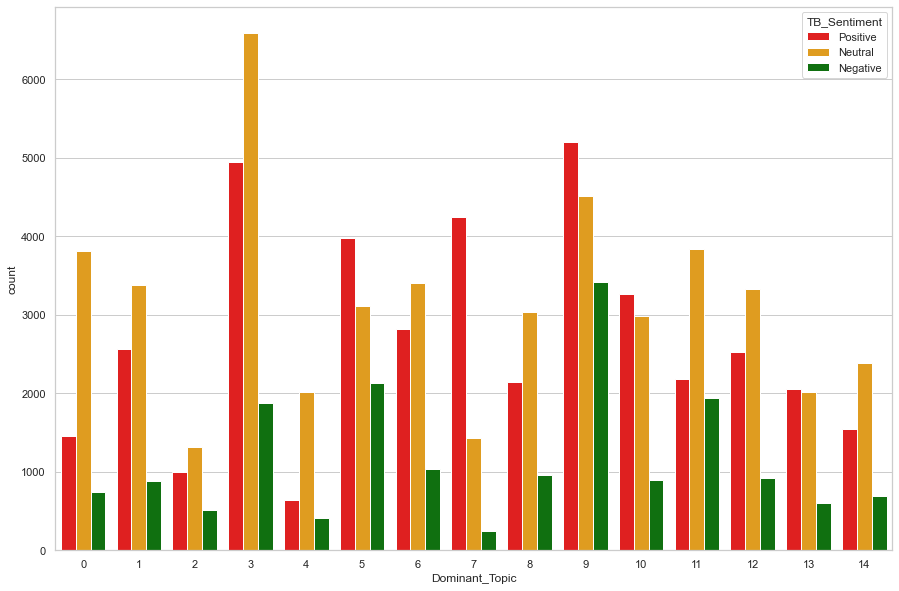

In [101]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Dominant_Topic', hue='TB_Sentiment', palette = ['red', 'orange', 'green'], hue_order = ['Positive', 'Neutral', "Negative"])
plt.show()

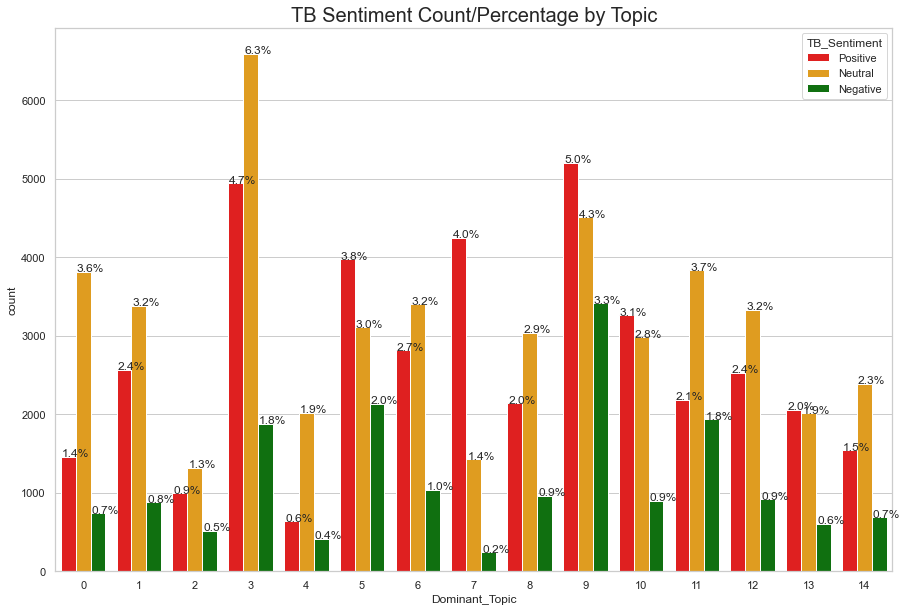

In [103]:
sns.set(style="whitegrid")

total = float(len(df))
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x='Dominant_Topic', hue='TB_Sentiment', palette = ['red', 'orange', 'green'], hue_order = ['Positive', 'Neutral', "Negative"])
plt.title('TB Sentiment Count/Percentage by Topic', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

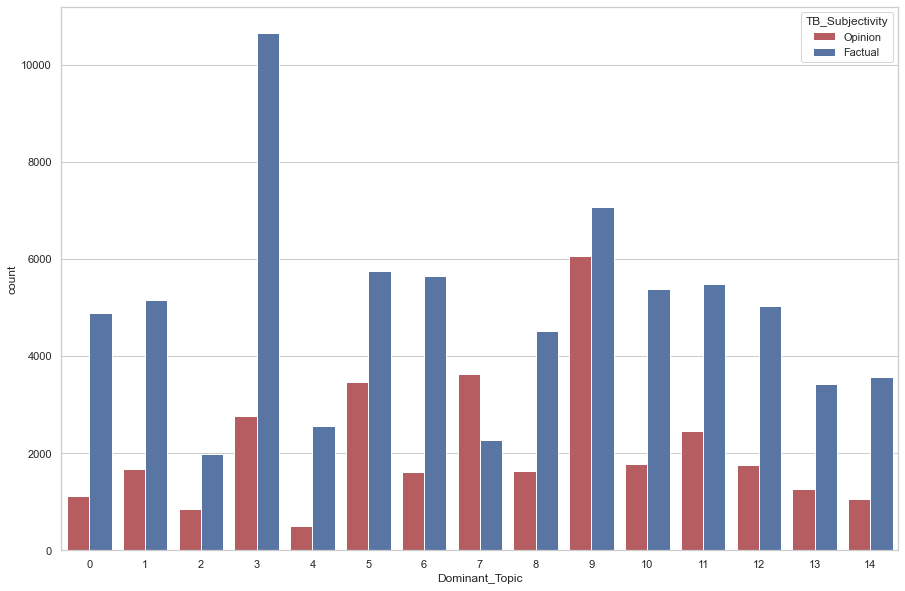

In [105]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='Dominant_Topic', hue='TB_Subjectivity', palette = ['C3', 'C0'])
plt.show()

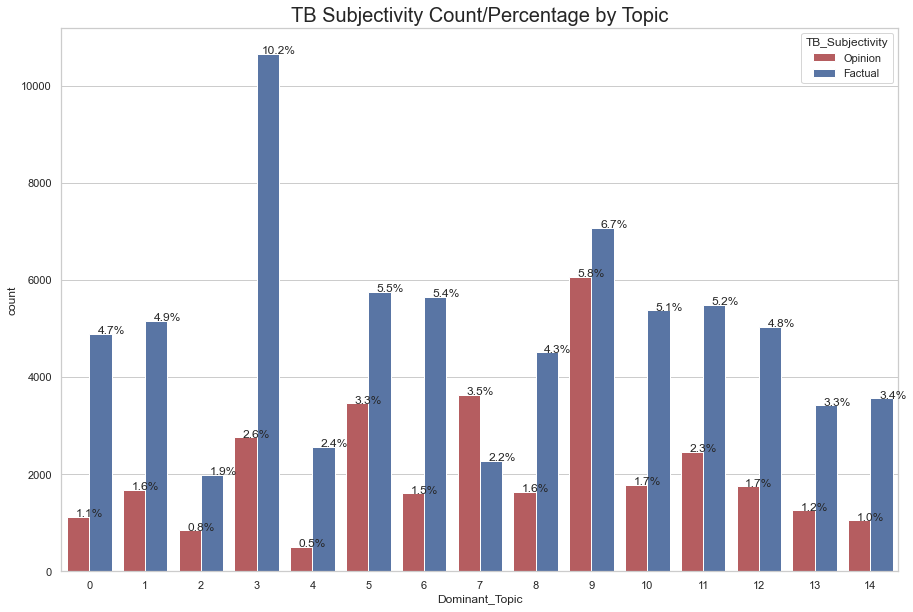

In [106]:
sns.set(style="whitegrid")

total = float(len(df))
plt.figure(figsize=(15, 10))
ax = sns.countplot(data=df, x='Dominant_Topic', hue='TB_Subjectivity', palette = ['C3', 'C0'])
plt.title('TB Subjectivity Count/Percentage by Topic', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [107]:
import seaborn as sns
var1 = df.groupby(['Dominant_Topic','TB_Sentiment']).count()['text'].reset_index().sort_values(by='Dominant_Topic',ascending=True)
sns.set_style("white")
sns.set_palette("Set3")
var1.style.background_gradient()

In [ ]:
#!pip install nrclex

In [108]:
from nrclex import NRCLex
def emotion(x):
    text = NRCLex(x)
    if text.top_emotions[0][1] == 0.0:
        return "No emotion"
    else:
        return text.top_emotions[0][0]
df['Emotion'] = df['clean_text'].apply(emotion)
df.head(50)

Dominant_Topic  Perc_Contribution  \
0               11             0.5456   
1                7             0.8173   
2                1             0.9977   
3                3             0.8239   
4                0             0.4599   
5                9             0.7387   
6                8             0.7373   
7                8             0.6730   
8                5             0.2922   
9               13             0.3506   
10              10             0.4965   
11               3             0.6312   
12               2             0.6830   
13               8             0.3518   
14              13             0.3205   
15               1             0.5499   
16              12             0.6616   
17               3             0.5048   
18               2             0.9977   
19               5             0.8488   
20               2             0.6267   
21               5             0.9994   
22               0             0.9931   
23               0             0.7320   
24              12             0.9987   
25              11             0.8384   
26              12             0.6448   
27               3             0.5247   
28               9             0.7504   
29              10             0.5966   
30               5             0.5008   
31               6             0.4122   
32               6             0.6505   
33               3             0.5717   
34              10             0.6475   
35               4             0.4735   
36              10             0.5520   
37               4             0.6284   
38               3             0.4554   
39               9             0.5039   
40              12             0.4991   
41               3             0.5221   
42              12             0.8994   
43               5             0.4033   
44              12             0.4495   
45               7             0.9980   
46              13             0.2797   
47               1             0.5116   
48               9             0.7247   
49               9             0.6956   

                                       Topic_Keywords  \
0   covid, ukraine, war, world, russia, china, lik...   
1   test, covid, positive, home, free, order, obam...   
2   covid, study, new, infection, case, china, ris...   
3   covid, case, death, new, report, update, march...   
4   covid, restriction, health, say, lift, public,...   
5   covid, get, people, mask, still, know, say, li...   
6   covid, patient, pandemic, care, hospital, impa...   
7   covid, patient, pandemic, care, hospital, impa...   
8   covid, amp, pandemic, people, work, woman, mak...   
9   covid, amp, get, vaccine, booster, clinic, boo...   
10  covid, school, community, available, amp, vacc...   
11  covid, case, death, new, report, update, march...   
12  die, covid, people, million, life, death, amer...   
13  covid, patient, pandemic, care, hospital, impa...   
14  covid, amp, get, vaccine, booster, clinic, boo...   
15  covid, study, new, infection, case, china, ris...   
16  vaccine, covid, child, dose, pfizer, kid, flor...   
17  covid, case, death, new, report, update, march...   
18  die, covid, people, million, life, death, amer...   
19  covid, amp, pandemic, people, work, woman, mak...   
20  die, covid, people, million, life, death, amer...   
21  covid, amp, pandemic, people, work, woman, mak...   
22  covid, restriction, health, say, lift, public,...   
23  covid, restriction, health, say, lift, public,...   
24  vaccine, covid, child, dose, pfizer, kid, flor...   
25  covid, ukraine, war, world, russia, china, lik...   
26  vaccine, covid, child, dose, pfizer, kid, flor...   
27  covid, case, death, new, report, update, march...   
28  covid, get, people, mask, still, know, say, li...   
29  covid, school, community, available, amp, vacc...   
30  covid, amp, pandemic, people, work, woman, mak...   
31  year, covid, pandemic, two, since, today, ago,...   
32  year, covid, pandemic, two,

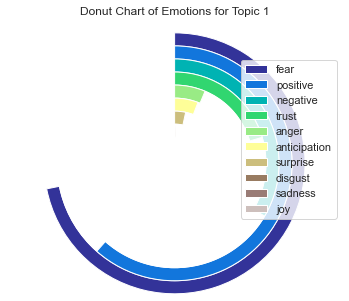

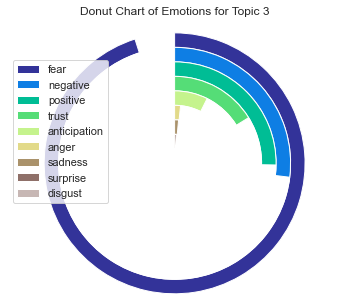

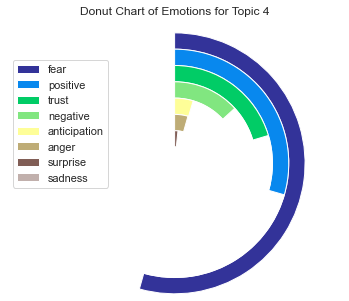

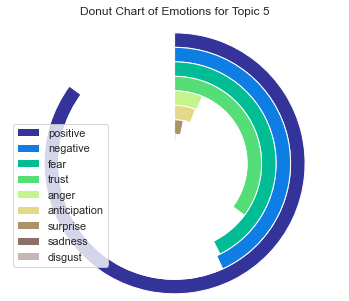

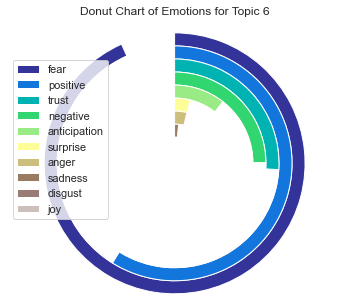

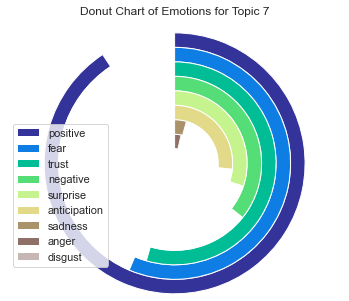

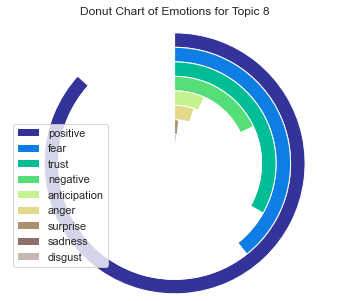

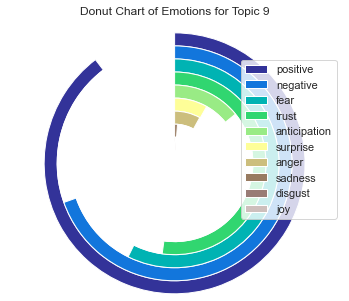

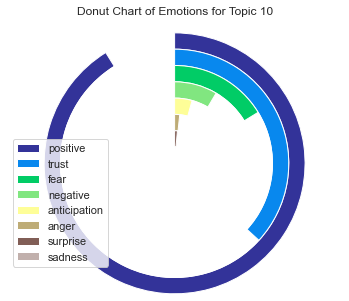

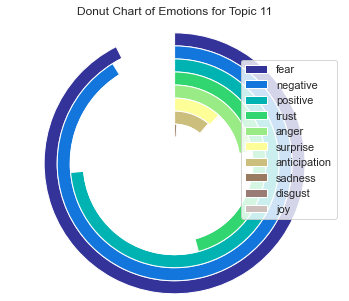

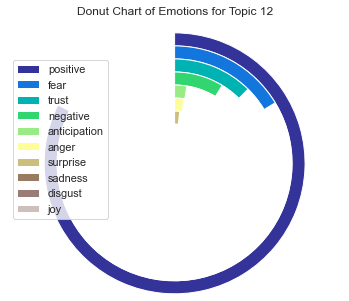

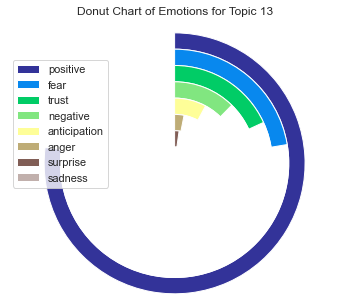

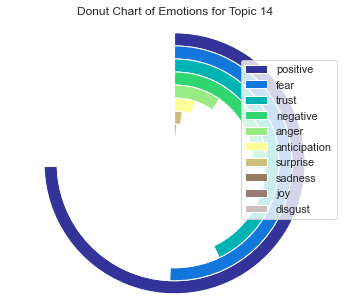

In [109]:
import matplotlib.pyplot as plt
from matplotlib import cm
from math import log10

for j in range(15):
    df_chart = df[(df.Emotion != "No emotion") & (df.Dominant_Topic == j)]
    labels = df_chart.Emotion.value_counts().index.tolist()    
    data = df_chart.Emotion.value_counts()
    #number of data points
    n = len(data)
    #find max value for full ring
    k = 10 ** int(log10(max(data)))
    m = k * (1 + max(data) // k)

    #radius of donut chart
    r = 1.5
    #calculate width of each ring
    w = r / n 

    #create colors along a chosen colormap
    colors = [cm.terrain(i / n) for i in range(n)]

    #create figure, axis
    fig, ax = plt.subplots()
    ax.axis("equal")

    #create rings of donut chart
    for i in range(n):
        #hide labels in segments with textprops: alpha = 0 - transparent, alpha = 1 - visible
        innerring, _ = ax.pie([m - data[i], data[i]], radius = r - i * w, startangle = 90, labels = ["", labels[i]], labeldistance = 1 - 1 / (1.5 * (n - i)), textprops = {"alpha": 0}, colors = ["white", colors[i]])
        plt.setp(innerring, width = w, edgecolor = "white")

    plt.legend()
    plt.title("Donut Chart of Emotions for Topic " + str(j) , pad = 40)
    plt.show()
 #   plt.savefig('DonutCharts.png')
 #   plt.close()

In [113]:
for j in range(15):
    df_chart = pd.DataFrame()
    df_chart = df[(df.Emotion != "No emotion") & (df.Dominant_Topic == j)]
    b = df_chart.Emotion.value_counts().index.tolist()
    a = df_chart.Emotion.value_counts(normalize = True).tolist()
    row = pd.DataFrame({'scenario' : []})
    row["scenario"] = b
    row["Percentage"] = a
    fig = px.treemap(row, path= ["scenario"], values="Percentage",title='Tree of Emotions for Topic ' + str(j))
    fig.show()